<a href="https://colab.research.google.com/github/mithun-martin/MACHINE-LEARNING/blob/main/MULTIPLE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math



In [ ]:
df = pd.read_csv("/content/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#converting dataframes in to arrayss pf both xs(r,a,m,s) and y (profit)


X = df[["R&D Spend", "Administration", "Marketing Spend", "State"]].values
#.values is converting dataframe into array
print(X)
y = df[["Profit"]].values
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [ ]:
#for catgorocal data we cant simply convert dataframes into simply 2d numpy arrays for training the model

In [ ]:
st = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = st.fit_transform(X)
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [ ]:

# st = ColumnTransformer(transformers, remainder)
st = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
# transformer name, transformer object, column index
X = st.fit_transform(X)
print(X)

#📌 Why remainder='passthrough' ?
#So that it doesn’t drop the other columns like R&D Spend, Administration, etc.
#It encodes State and leaves the rest as-is.

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 197 stored elements and shape (50, 54)>
  Coords	Values
  (0, 48)	1.0
  (0, 51)	1.0
  (0, 52)	136897.8
  (0, 53)	471784.1
  (1, 47)	1.0
  (1, 49)	1.0
  (1, 52)	151377.59
  (1, 53)	443898.53
  (2, 46)	1.0
  (2, 50)	1.0
  (2, 52)	101145.55
  (2, 53)	407934.54
  (3, 45)	1.0
  (3, 51)	1.0
  (3, 52)	118671.85
  (3, 53)	383199.62
  (4, 44)	1.0
  (4, 50)	1.0
  (4, 52)	91391.77
  (4, 53)	366168.42
  (5, 42)	1.0
  (5, 51)	1.0
  (5, 52)	99814.71
  (5, 53)	362861.36
  (6, 43)	1.0
  :	:
  (43, 51)	1.0
  (43, 52)	127382.3
  (43, 53)	35534.17
  (44, 6)	1.0
  (44, 49)	1.0
  (44, 52)	154806.14
  (44, 53)	28334.72
  (45, 2)	1.0
  (45, 51)	1.0
  (45, 52)	124153.04
  (45, 53)	1903.93
  (46, 3)	1.0
  (46, 50)	1.0
  (46, 52)	115816.21
  (46, 53)	297114.46
  (47, 0)	1.0
  (47, 49)	1.0
  (47, 52)	135426.92
  (48, 1)	1.0
  (48, 51)	1.0
  (48, 52)	51743.15
  (49, 0)	1.0
  (49, 49)	1.0
  (49, 52)	116983.8
  (49, 53)	45173.06


In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [ ]:

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#We will predict the Brain weight by giving an input of Brain Size
y_pred = model.predict(X_test)

In [ ]:
print("Predicted values:\n", y_pred)
print("Actual values:\n", y_test)


Predicted values:
 [[128532.95430588]
 [ 92805.78249267]
 [ 71583.47642999]
 [ 54497.27936219]
 [137414.75647305]
 [ 34163.36160674]
 [ 91183.1811581 ]
 [ 98096.58854915]
 [ 70000.42988226]
 [ 62006.39745457]]
Actual values:
 [[134307.35]
 [ 81005.76]
 [ 99937.59]
 [ 64926.08]
 [125370.37]
 [ 35673.41]
 [105733.54]
 [107404.34]
 [ 97427.84]
 [122776.86]]


In [ ]:

mse = mean_squared_error(y_test,y_pred)
print(mse)

1260753084.3663702


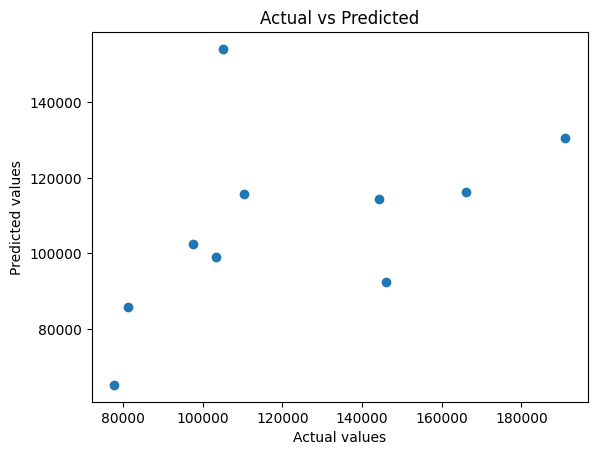

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")
plt.show()


In [ ]:
#And those don’t match the top rows of your dataset, because:

#✔️ train_test_split() randomly shuffles and splits the data unless you tell it not to.

#So those y_test values are a subset of the Profit column, but from random rows of the dataset —
#not the first 5 or 10 rows

